In [2]:
import numpy as np
import pandas as pd
#These above libs make data analysis of sections

import matplotlib.pyplot as plt
import seaborn as sns
#These above libs are drawing graph,hist,etc..

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#The above ml(machine learning) libs.We are imported in my program


In [4]:
data=pd.read_excel('C:\\Users\\aAa\\Desktop\\BD\\machine learning\\Iris.xls')
#We loaded iris dataset

In [5]:
for column in data.columns:
    print(column)
    
print('-'*40)

#These section show dataset's columns

sepal length
sepal width
petal length
petal width
iris
----------------------------------------


In [6]:
data=data.rename(columns={'sepal length':'sepal_length','sepal width':'sepal_width','petal length':'petal_length','petal width':'petal_width','iris':'species'})
#We replace column's name because there are some problems when we make analysis

In [7]:
for column in data.columns:
    print(column)

sepal_length
sepal_width
petal_length
petal_width
species


In [8]:
print(data.head())
#We show top 5 rows

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [9]:
print(data.tail())
#We show last 5 rows

     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [11]:
print(data.shape)
#We show how dataset columns,rows.First one is row,Second one ise column

(150, 5)


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB
None


In [13]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [15]:
data['id']=range(1,151)
#When we make data analysis this section wil be important

In [17]:
count1=data[['species','sepal_width']].groupby(['species'],as_index=False).mean().sort_values(by='sepal_width',ascending=False)
print(count1)
print('-'*40)
count2=data[['species','sepal_length']].groupby(['species'],as_index=False).mean().sort_values(by='sepal_length',ascending=False)
print(count2)
print('-'*40)
count3=data[['species','petal_width']].groupby(['species'],as_index=False).mean().sort_values(by='petal_width',ascending=False)
print(count3)
print('-'*40)
count4=data[['species','petal_length']].groupby(['species'],as_index=False).mean().sort_values(by='petal_length',ascending=False)
print(count4)

#We calculate all of them which sepal width,sepal length,petal width,petal length



           species  sepal_width
0      Iris-setosa        3.418
2   Iris-virginica        2.974
1  Iris-versicolor        2.770
----------------------------------------
           species  sepal_length
2   Iris-virginica         6.588
1  Iris-versicolor         5.936
0      Iris-setosa         5.006
----------------------------------------
           species  petal_width
2   Iris-virginica        2.026
1  Iris-versicolor        1.326
0      Iris-setosa        0.244
----------------------------------------
           species  petal_length
2   Iris-virginica         5.552
1  Iris-versicolor         4.260
0      Iris-setosa         1.464


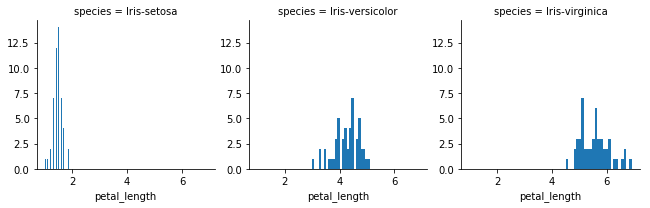

In [18]:
g=sns.FacetGrid(data,col='species')
g.map(plt.hist,'petal_length',bins=25)
plt.show()

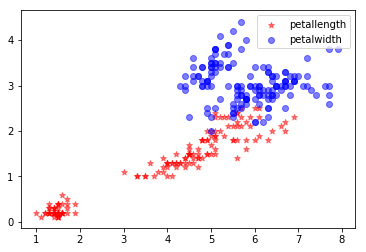

In [19]:

plt.scatter(data['petal_length'],data['petal_width'],marker='*',alpha=.5,color='red',label='petallength')
plt.scatter(data['sepal_length'],data['sepal_width'],marker='o',alpha=.5,color='blue',label='petalwidth')
plt.legend()
plt.show()

#We draw scatter petal_length and sepal_length to petal_width,sepal_with and show them

In [20]:
data2=data.loc[:,'species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

#We replace species column's value for 0,1,2 because after will split them for data traning 


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data3=le.fit_transform(data['species'])
#This section same [20] convert to species 0,1,2

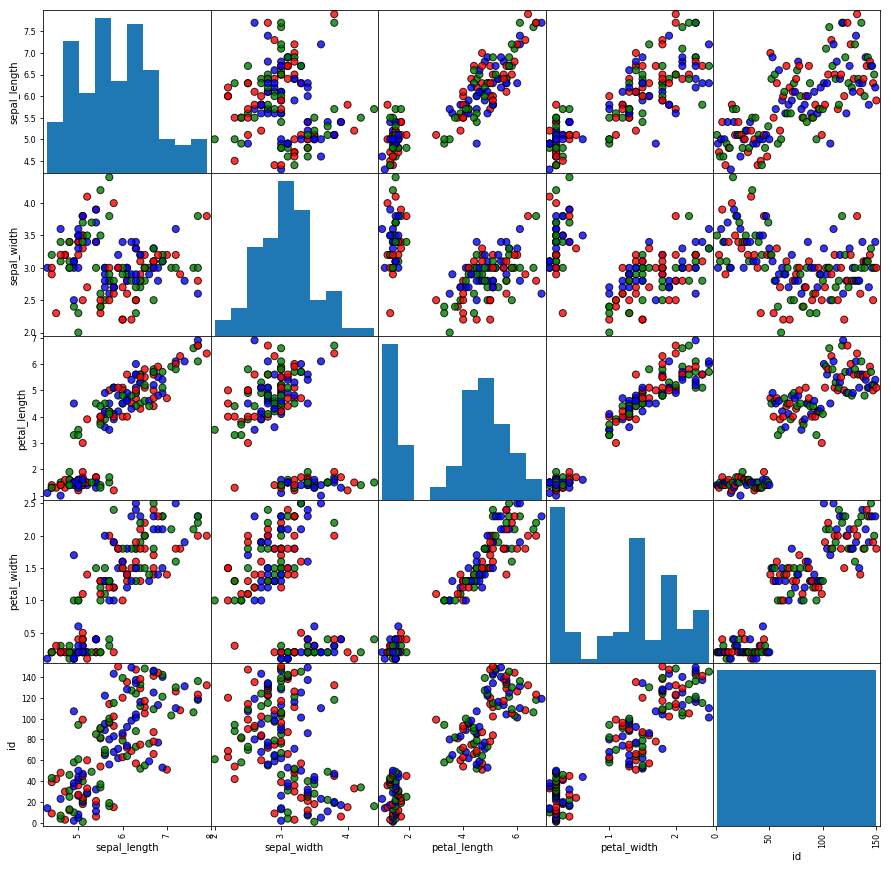

In [23]:
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'species'],
                                       c=['green','blue','red'],
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.8,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

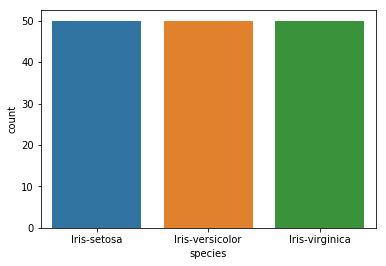

In [24]:
sns.countplot(x='species',data=data)
data.loc[:,'species'].value_counts()
plt.show()

#we calculate to count column's species

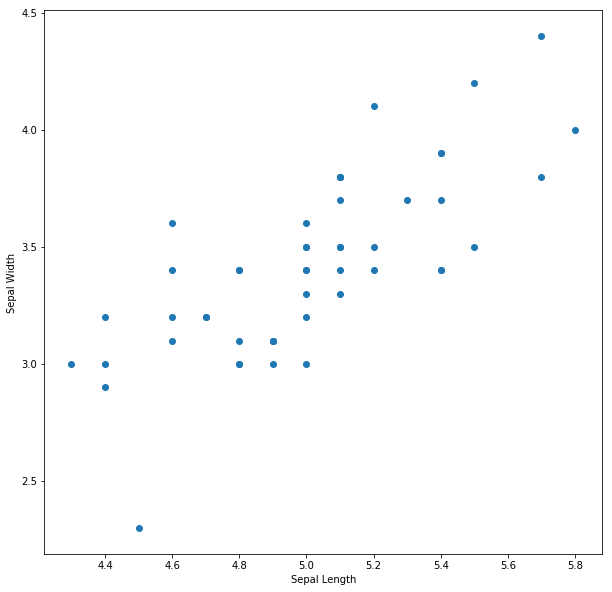

In [25]:
data1=data[data['species']=='Iris-setosa']
x=np.array(data1.loc[:,'sepal_length']).reshape(-1,1)
y=np.array(data1.loc[:,'sepal_width']).reshape(-1,1)
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

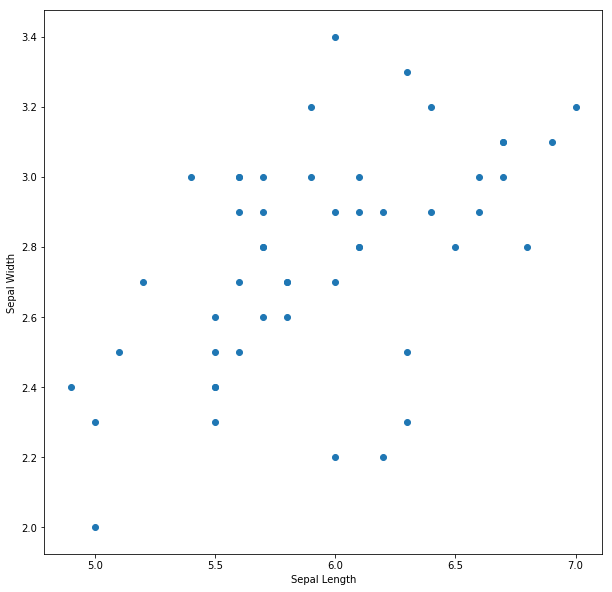

In [26]:
data1=data[data['species']=='Iris-versicolor']
x=np.array(data1.loc[:,'sepal_length']).reshape(-1,1)
y=np.array(data1.loc[:,'sepal_width']).reshape(-1,1)
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

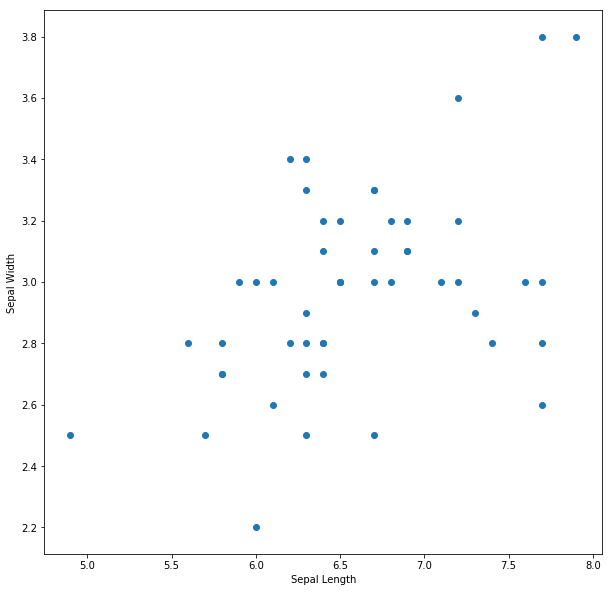

In [27]:
data1=data[data['species']=='Iris-virginica']
x=np.array(data1.loc[:,'sepal_length']).reshape(-1,1)
y=np.array(data1.loc[:,'sepal_width']).reshape(-1,1)
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

C:\Users\aAa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


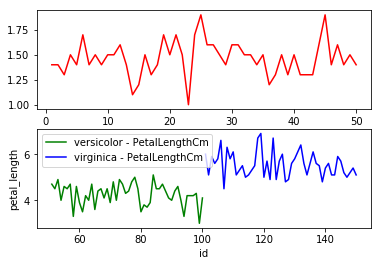

In [28]:
setosa=data[data.species=='Iris-setosa']
versicolor=data[data.species=='Iris-versicolor']
virginica=data[data.species=='Iris-virginica']

plt.subplot(2,1,1)
plt.plot(setosa.id,setosa['petal_length'],color='red',label='setosa - PetalLengthCm')

plt.subplot(2,1,2)
plt.plot(versicolor.id,versicolor['petal_length'],color='green',label='versicolor - PetalLengthCm')

plt.subplot(2,1,2)
plt.plot(virginica.id,virginica['petal_length'],color='blue',label='virginica - PetalLengthCm')

plt.xlabel('id')
plt.ylabel('petal_length')
plt.legend()
plt.show()

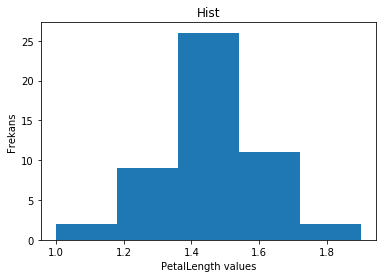

In [29]:
plt.hist(setosa.iloc[:,2],bins=5)
plt.xlabel('PetalLength values')
plt.ylabel('Frekans')
plt.title('Hist')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,0:4],data2,test_size=0.3,random_state=0)

#we split them for train and test data's

In [32]:
logreg=LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)
#we have firs ml algroithm is LogisticRegression
#and x_train,y_train fitted for this algorithm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred=logreg.predict(x_test)
#when fitted this above algorithm and last one ise predicted x_test data

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

#This section is confusion_matrix so when we fitted and how many were right

[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]


In [35]:
logreg_test=logreg.score(x_test,y_test)
logreg_train=logreg.score(x_train,y_train)

print('Test set score :{:.2f}'.format(logreg_test))
print('Train set score :{:.2f}'.format(logreg_train))

print('-'*40)

#Train and test accuracy for LogisticRegression algo.so good.

Test set score :0.89
Train set score :0.94
----------------------------------------


In [36]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)

linreg_test=linreg.score(x_test,y_test)
linreg_train=linreg.score(x_train,y_train)

print('Test set score :{:.2f}'.format(linreg_test))
print('Train set score :{:.2f}'.format(linreg_train))

#Other algorithm is LinearRegression this result is good.
#predict_space=np.linspace(min(y_test),max(y_test)).reshape(-1,1)

Test set score :0.90
Train set score :0.94


----------------------------------------


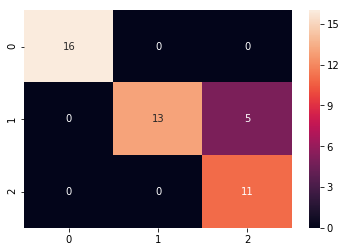

In [37]:
print('-'*40)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

#This map is very useful for calculate confusion matrix

In [38]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)


svc_test=svc.score(x_test,y_test)
svc_train=svc.score(x_train,y_train)

print('Test set score :{:.2f}'.format(svc_test))
print('Train set score :{:.2f}'.format(svc_train))

print('-'*40)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test set score :0.98
Train set score :0.98
----------------------------------------


In [39]:
linsvc=LinearSVC()
linsvc.fit(x_train,y_train)
y_pred=linsvc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

linsvc_test=linsvc.score(x_test,y_test)
linsvc_train=linsvc.score(x_train,y_train)

print('Test set score :{:.2f}'.format(linsvc_test))
print('Train set score :{:.2f}'.format(linsvc_train))

print('-'*40)

[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
Test set score :0.93
Train set score :0.98
----------------------------------------


In [40]:
rndf=RandomForestClassifier(random_state=0)
rndf.fit(x_train,y_train)
y_pred=rndf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)


rndf_test=rndf.score(x_test,y_test)
rndf_train=rndf.score(x_train,y_train)

print('Test set score :{:.2f}'.format(rndf_test))
print('Train set score :{:.2f}'.format(rndf_train))

print('-'*40)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test set score :0.98
Train set score :0.99
----------------------------------------


In [41]:
print('-'*40)

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)


knc_test=knc.score(x_test,y_test)
knc_train=knc.score(x_train,y_train)

print('Test set score :{:.2f}'.format(knc_test))
print('Train set score :{:.2f}'.format(knc_train))

print('-'*40)

----------------------------------------
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test set score :0.98
Train set score :0.97
----------------------------------------


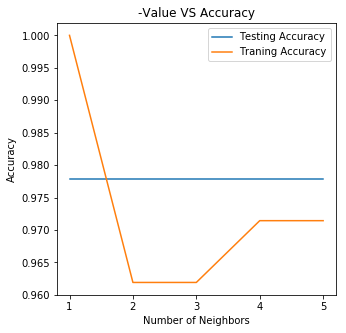

Best accuracy is 0.9777777777777777 with K=1
----------------------------------------


In [42]:
neig=np.arange(1,6)
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(neig):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.figure(figsize=[5,5])
plt.plot(neig,test_accuracy,label='Testing Accuracy')
plt.plot(neig,train_accuracy,label='Traning Accuracy')
plt.legend()
plt.title('-Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print('Best accuracy is {} with K={}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


print('-'*40)

In [43]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(gnb.theta_)
cm=confusion_matrix(y_test,y_pred)
print(cm)


gnb_test=gnb.score(x_test,y_test)
gnb_train=gnb.score(x_train,y_train)

print('Test set score :{:.2f}'.format(gnb_test))
print('Train set score :{:.2f}'.format(gnb_train))

print('-'*40)

#This result is very good.%100

[[ 4.99411765  3.38235294  1.45294118  0.22941176]
 [ 5.921875    2.75625     4.196875    1.30625   ]
 [ 6.65384615  2.98717949  5.5974359   2.03076923]]
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Test set score :1.00
Train set score :0.94
----------------------------------------


In [44]:
sgdc=SGDClassifier(random_state=0)
sgdc.fit(x_train,y_train)
y_pred=sgdc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)


sgdc_test=sgdc.score(x_test,y_test)
sgdc_train=sgdc.score(x_train,y_train)

print('Test set score :{:.2f}'.format(sgdc_test))
print('Train set score :{:.2f}'.format(sgdc_train)) 

print('-'*40)
#This result is very bad.

[[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]
Test set score :0.60
Train set score :0.70
----------------------------------------


C:\Users\aAa\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [45]:
print('-'*40)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)


dtc_test=dtc.score(x_test,y_test)
dtc_train=dtc.score(x_train,y_train)

print('Test set score :{:.2f}'.format(dtc_test))
print('Train set score :{:.2f}'.format(dtc_train))  

#This algo. is very good.DTC is very popular for DS

----------------------------------------
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test set score :0.98
Train set score :1.00


In [47]:
sonuclar={'ML':['LogisticRegression','LinearRegression','SVC','LinearSVC','RandomForest','KNN','GaussianNB','SGD','DecisionTree']
,'Test Accuracy':[logreg_test,linreg_test,svc_test,linsvc_test,rndf_test,knc_test,gnb_test,sgdc_test,dtc_test]
,'Train Accuracy':[logreg_train,linreg_train,svc_train,linsvc_train,rndf_train,knc_train,gnb_train,sgdc_train,dtc_train]}

In [48]:
sonuclar1=pd.DataFrame(data=sonuclar,index=range(1,10))
print(sonuclar1)


                   ML  Test Accuracy  Train Accuracy
1  LogisticRegression       0.888889        0.942857
2    LinearRegression       0.899945        0.938931
3                 SVC       0.977778        0.980952
4           LinearSVC       0.933333        0.980952
5        RandomForest       0.977778        0.990476
6                 KNN       0.977778        0.971429
7          GaussianNB       1.000000        0.942857
8                 SGD       0.600000        0.695238
9        DecisionTree       0.977778        1.000000
